# Random Forest Classifier


In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
  

In [172]:
df = pd.read_csv("thursday_plus_cleaned.csv", skipinitialspace=True, encoding = 'latin-1')
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])  
y_encoded = encoder.fit_transform(df['Label'])
X = df.iloc[:, 0:85]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=42, stratify=y_encoded, test_size = 0.2)
df.head()

,Flow ID,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label
0,8.6.0.1-8.0.6.4-0-0-0,0,0,0,119945515,150,0,0,0,0,...,20364643,6,24368817.25,2.431326e+07,60127797,5702188,-1,-1,0,0
1,192.168.10.50-192.168.10.3-33898-389-6,33898,389,6,113095465,48,24,9668,10012,403,...,1629110,379,13821156.00,4.277541e+06,16482821,6737603,-1,-1,113095465,0
2,192.168.10.50-192.168.10.3-33904-389-6,33904,389,6,113473706,68,40,11364,12718,403,...,1424245,325,13846819.13,4.229413e+06,16482853,6945512,-1,-1,113473706,0
3,192.168.10.19-192.168.10.3-32794-389-6,32794,389,6,118034439,106,61,17896,27110,1313,...,3343206,636188,21923231.40,1.681534e+07,49024651,6604342,-1,-1,118034439,0
4,192.168.10.19-192.168.10.3-44766-3268-6,44766,3268,6,116446503,72,47,13380,15294,1313,...,3552487,296,28210375.75,1.591666e+07,49206703,11080571,-1,-1,116446503,0


In [173]:
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])
X_train.dtypes

Src Port               int64
Dst Port               int64
Protocol               int64
Flow Duration          int64
Total Fwd Packet       int64
                       ...  
Idle Max               int64
Idle Min               int64
ICMP Code              int64
ICMP Type              int64
Total TCP Flow Time    int64
Length: 84, dtype: object

In [174]:
rfc1 = RandomForestClassifier().fit(X_train, y_train)

In [175]:
rfc1.predict(X_test)

array([0, 0, 0, ..., 2, 0, 0])

In [176]:
y_pred = rfc1.predict(X_test)
accuracy_score(y_test,y_pred)

0.9999297594965161

In [177]:
from sklearn.model_selection import GridSearchCV

In [178]:
param_grid = {
  "n_estimators": [50,100,200,300],
  "max_depth" : [None, 10, 20, 30],
  "min_samples_split" : [2, 5, 10],
  "min_samples_leaf" : [1,2,4],
  "max_features": ["auto","sqrt"]
}

In [179]:
rfc2 = RandomForestClassifier()

In [180]:
grid_search = GridSearchCV(estimator= rfc2, param_grid = param_grid, cv = 5)

In [181]:
#grid_search.fit(X_train, y_train)

In [182]:
#grid_search.best_params_

In [183]:
#best_rfc2 = grid_search.best_estimator_

In [184]:
#y_pred_tuned = best_rfc2.predict(X_test)

In [185]:
#accuracy_score(y_test,y_pred_tuned)

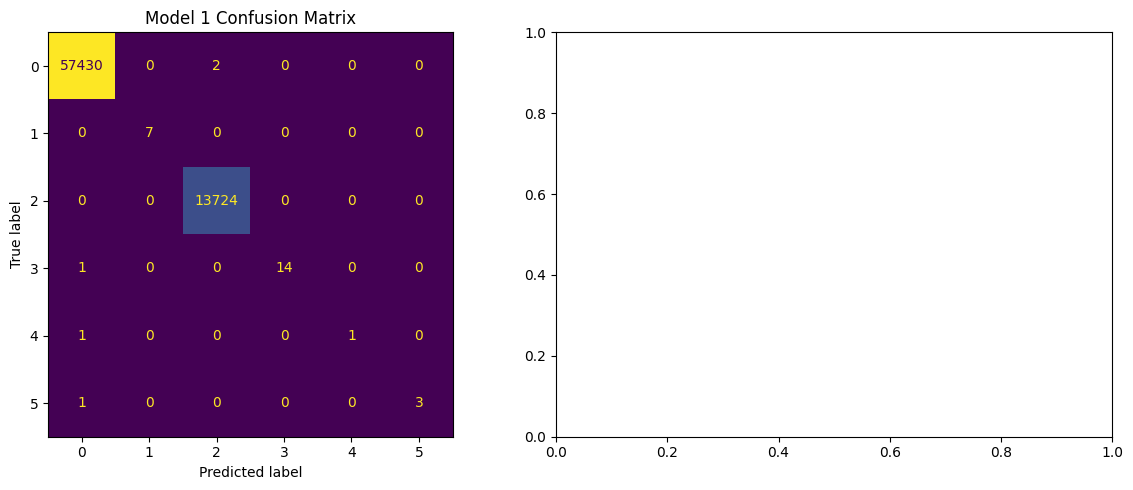

In [186]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = encoder.classes_
cm1 = confusion_matrix(y_test, y_pred)
#cm2 = confusion_matrix(y_test, y_pred_tuned)
fig, axes = plt.subplots(1, 2, figsize =(12,5))
disp1 = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = class_names)
disp1.plot(ax = axes[0], colorbar = False)
axes[0].set_title("Model 1 Confusion Matrix")
plt.tight_layout()
plt.show()


In [187]:
disp1 = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = class_names)
disp1.plot(ax = axes[0], colorbar = False)
axes[0].set_title("Model 1 Confusion Matrix")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [188]:
#disp2 = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels=class_names)
#disp2.plot(ax = axes[0], colorbar = False)
#axes[0].set_title("Model 2 Confusion Matrix")

In [189]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

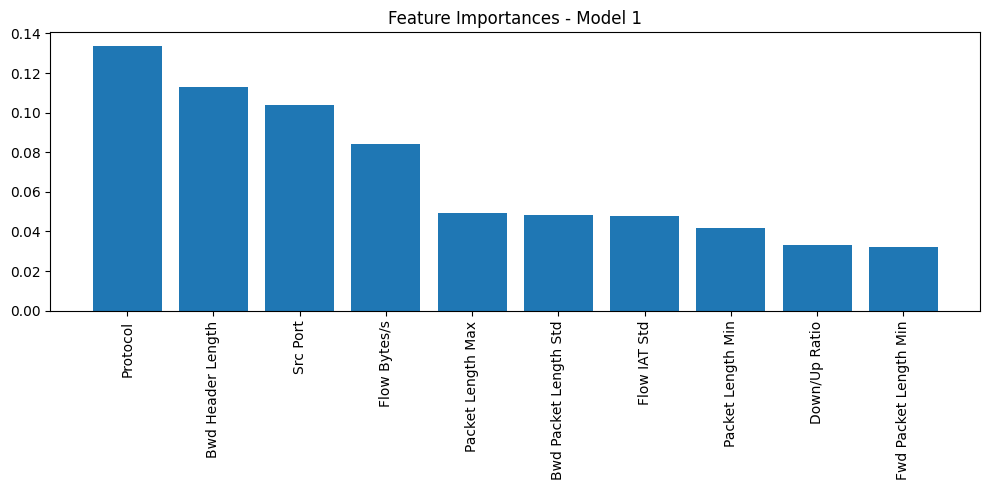

In [190]:
importances = rfc1.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature Importances - Model 1")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), X.columns[indices[:10]], rotation=90)
plt.tight_layout()
plt.show()


In [191]:
'''
importances = rfc2.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature Importances - Model 1")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), X.columns[indices[:10]], rotation=90)
plt.tight_layout()
plt.show()
'''

'\nimportances = rfc2.feature_importances_\nindices = np.argsort(importances)[::-1]\nplt.figure(figsize=(10, 5))\nplt.title("Feature Importances - Model 1")\nplt.bar(range(10), importances[indices[:10]])\nplt.xticks(range(10), X.columns[indices[:10]], rotation=90)\nplt.tight_layout()\nplt.show()\n'

In [192]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57432
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00     13724
           3       1.00      0.93      0.97        15
           4       1.00      0.50      0.67         2
           5       1.00      0.75      0.86         4

    accuracy                           1.00     71184
   macro avg       1.00      0.86      0.91     71184
weighted avg       1.00      1.00      1.00     71184



In [193]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc1, X_train, y_train, cv=5)
print("Cross-validated accuracy:", scores.mean())

Cross-validated accuracy: 0.9998911264055227


In [194]:
false_negatives = (y_test != y_pred) & (y_test != 0) & (y_pred == 0)

X_fn = X_test[false_negatives]
y_fn_true = y_test[false_negatives]

# Concatenate for review
fn_df = X_fn.copy()
fn_df['True_Label'] = y_fn_true

# Look at them
fn_df.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,True_Label
234030,44634,80,6,20848310,84,44,16995,36979,602,0,...,0,0,0.0,0.0,0,0,-1,-1,20848310,3
218672,36242,80,6,5017466,6,6,599,4149,599,0,...,12710,12710,5004049.0,0.0,5004049,5004049,-1,-1,5017466,4
195268,35626,80,6,53205463,158,80,37362,140083,585,0,...,0,0,0.0,0.0,0,0,-1,-1,53205463,5


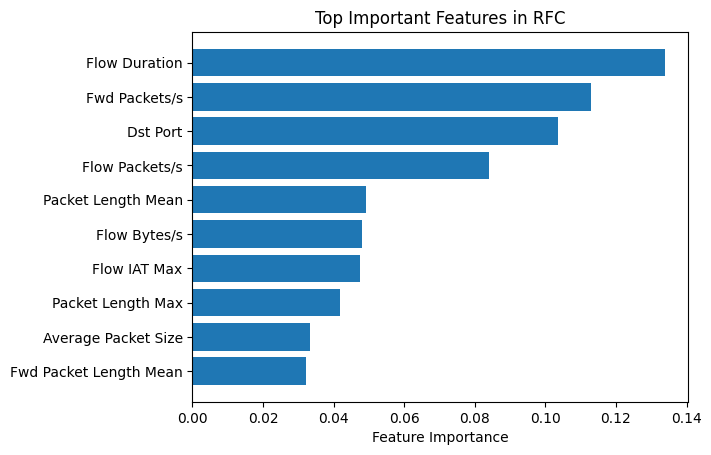

In [195]:
feat_names = X_train.columns

# Top features
indices = np.argsort(importances)[-10:]
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [feat_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top Important Features in RFC")
plt.show()

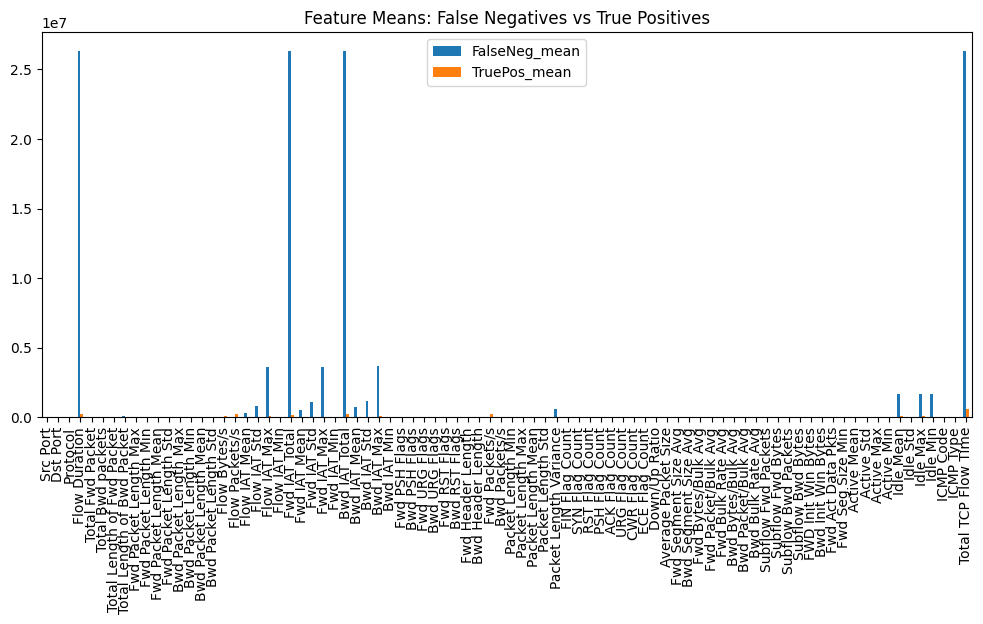

In [196]:
# Get correctly predicted attack samples (true positives)
tp_mask = (y_test != 0) & (y_test == y_pred)
X_tp = X_test[tp_mask]

# Compare mean feature values of FNs vs TPs
compare = pd.DataFrame({
    "FalseNeg_mean": X_fn.mean(),
    "TruePos_mean": X_tp.mean()
})

# Optional: visualize differences
compare.plot(kind='bar', figsize=(12, 5), title="Feature Means: False Negatives vs True Positives")
plt.xticks(rotation=90)
plt.show()